# Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data # and identify the number of clusters formed and draw inferences.

'''Data Description:
Murder -- Muder rates in different places of United States
Assualt- Assualt rate in different places of United States
UrbanPop - urban population in different places of United States
Rape - Rape rate in different places of United States'''

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from scipy.spatial.distance import cdist 
from sklearn.preprocessing import StandardScaler

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
from google.colab import files
uploaded= files.upload()

Saving crime_data.csv to crime_data.csv


In [ ]:
crime= pd.read_csv('crime_data.csv')
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [ ]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


<AxesSubplot:ylabel='Frequency'>

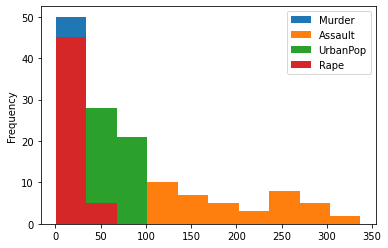

In [ ]:
crime.plot.hist()

# Hierarchical

In [ ]:
# Normalization function # use sklearn library norm
# Normalize Heterogenous numerical data using z-score(x-mean/std) or custom defined function
def norm_func(i):
  x= (i-i.min())/(i.max()-i.min())
  return x

# Normalized data frame (considering the numerical part of data)
crime_norm= norm_func(crime.iloc[:,1:])
crime_norm.head(10)

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


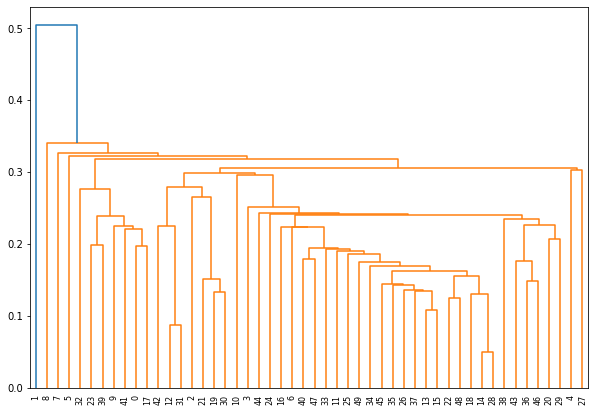

In [ ]:
# Create Dendrogram using single method
plt.figure(figsize= (10,7))
dendrograms= sch.dendrogram(sch.linkage(crime_norm,method= 'single'))

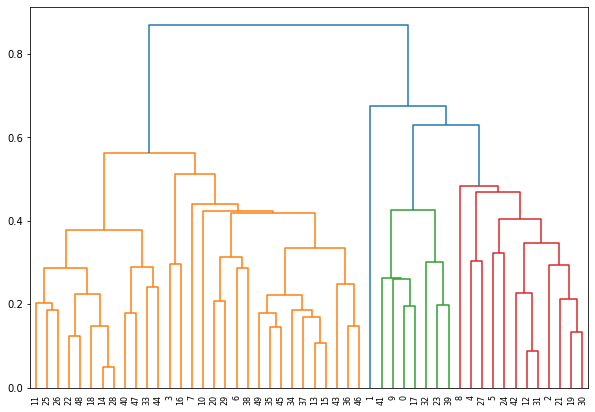

In [ ]:
# Create Dendrogram using average method
plt.figure(figsize= (10,7))
dendrograms= sch.dendrogram(sch.linkage(crime_norm,method= 'average'))

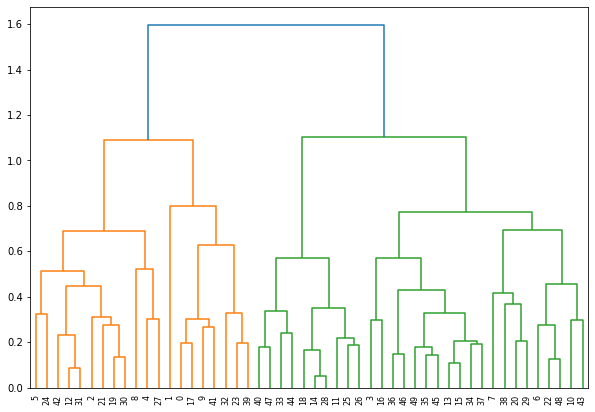

In [ ]:
# Create Dendrogram using complete method
plt.figure(figsize= (10,7))
dendrograms= sch.dendrogram(sch.linkage(crime_norm,method= 'complete'))

In [ ]:
# Create clusters(y)
hc= AgglomerativeClustering(n_clusters= 4, affinity='euclidean', linkage='single')
hc

AgglomerativeClustering(linkage='single', n_clusters=4)

In [ ]:
# save clusters for chart
y_hc= hc.fit_predict(crime_norm)
clusters= pd.DataFrame(y_hc, columns=['Clusters'])

In [ ]:
y= pd.DataFrame(hc.fit_predict(crime_norm), columns=['Clusters'])
y['Clusters'].value_counts()

0    47
3     1
1     1
2     1
Name: Clusters, dtype: int64

In [ ]:
clusters

,Clusters
0,3
1,0
2,0
3,4
4,0
5,0
6,1
7,1
8,0
9,3


# K-Means

<AxesSubplot:xlabel='X', ylabel='Y'>

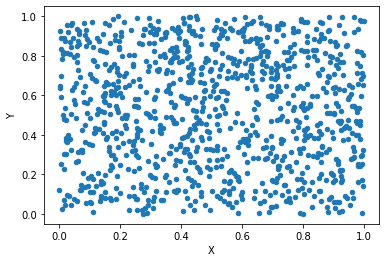

In [ ]:
X= np.random.uniform(0,1,1000)
Y= np.random.uniform(0,1,1000)
df_xy= pd.DataFrame(columns= ['X','Y'])
df_xy.X= X
df_xy.Y= Y
df_xy.plot(x='X',y='Y',kind='scatter')


<AxesSubplot:xlabel='X', ylabel='Y'>

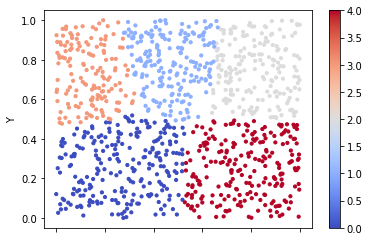

In [ ]:
model1= KMeans(n_clusters= 5).fit(df_xy)

df_xy.plot(x='X',y='Y', c=model1.labels_, kind='scatter', s=10, cmap= plt.cm.coolwarm)
# This performs K-means clustering on the df_xy Dataframe using scikit_learn KMeans algorithm with 5 clusters

In [ ]:
from google.colab import files
uploaded= files.upload()

Saving crime_data.csv to crime_data (1).csv


In [ ]:
crime1= pd.read_csv('crime_data.csv')
crime1.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [ ]:
# Normalization function
def norm_func(i):
  x=(i-i.min())/(i.max()-i.min())
  return(x)

# Normalization dataframe (considering the numerical part of data)
crime1_norm= norm_func(crime1.iloc[:,1:])
crime1_norm.head(10)

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


In [ ]:
model=KMeans(n_clusters=5)
model.fit(crime1_norm)

model.labels_ # getting the labels of clusters assigned to each row

array([0, 3, 3, 1, 3, 3, 4, 1, 3, 0, 4, 2, 3, 1, 2, 1, 1, 0, 2, 3, 4, 3,
       2, 0, 1, 2, 2, 3, 2, 4, 3, 3, 0, 2, 4, 1, 1, 4, 4, 0, 2, 0, 3, 4,
       2, 1, 4, 2, 2, 1], dtype=int32)

In [ ]:
cr= pd.Series(model.labels_) # converting numpy array into pandas series object 
crime1['CLUST']= cr # creating a  new column and assigning it to new column 
crime1_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


In [ ]:
crime1.iloc[:,1:5].groupby(crime1.CLUST).mean()

,Murder,Assault,UrbanPop,Rape
CLUST,,,,
0,10.966667,264.000000,76.500000,33.608333
1,4.428571,129.000000,82.000000,17.685714
2,6.950000,143.357143,63.928571,19.542857
3,2.680000,70.100000,51.000000,10.910000
4,14.671429,251.285714,54.285714,21.685714


In [ ]:
crime1.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,CLUST
0,Alabama,13.2,236,58,21.2,4
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,0


In [ ]:
Wcss=[]
for i in range(1,11):
  kmeans= KMeans(n_clusters= i,random_state= 2)
  kmeans.fit(crime1_norm)
  Wcss.append(kmeans.inertia_)

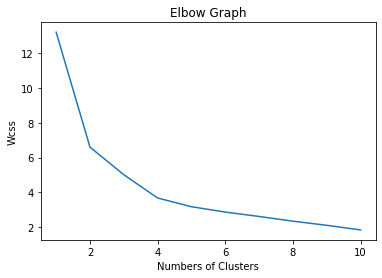

In [ ]:
plt.plot(range(1,11), Wcss)
plt.title('Elbow Graph')
plt.xlabel('Numbers of Clusters')
plt.ylabel('Wcss')
plt.show()

# DBSCAN

In [ ]:
from google.colab import files
uploaded= files.upload()

Saving crime_data.csv to crime_data (2).csv


In [ ]:
crime2= pd.read_csv('crime_data.csv')
crime2.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [ ]:
crime2.drop(['Unnamed: 0'], axis=1, inplace= True)
crime2.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [ ]:
array= crime2.values
array

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

In [ ]:
stscaler= StandardScaler().fit(array)
X= stscaler.transform(array)
X

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [ ]:
dbscan= DBSCAN(eps=1, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=1)

In [ ]:
dbscan.labels_

array([-1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,  0, -1,  0,  0,  0,  0,
       -1,  0, -1,  1, -1,  0, -1,  0,  0,  0, -1,  0,  1, -1, -1, -1,  0,
        0,  0,  0,  0,  1, -1,  0, -1, -1,  0, -1,  0,  0,  0,  0,  0])

In [ ]:
cl= pd.DataFrame(dbscan.labels_, columns= ['clusters'])
cl

,clusters
0,-1
1,-1
2,-1
3,-1
4,-1
5,-1
6,0
7,-1
8,-1
9,-1


In [ ]:
pd.concat([crime2,cl], axis=1)

,Murder,Assault,UrbanPop,Rape,clusters
0,13.2,236,58,21.2,-1
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,-1
4,9.0,276,91,40.6,-1
5,7.9,204,78,38.7,-1
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,-1
8,15.4,335,80,31.9,-1
9,17.4,211,60,25.8,-1
